In [76]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [77]:
#Load file
data = pd.read_csv(r"C:\Users\thobi\Downloads\diabetes_012_health_indicators_BRFSS2015.csv (1)\diabetes_012_health_indicators_BRFSS2015.csv")
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [78]:
#checking for missing data
data.isnull()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
253676,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
253677,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
253678,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


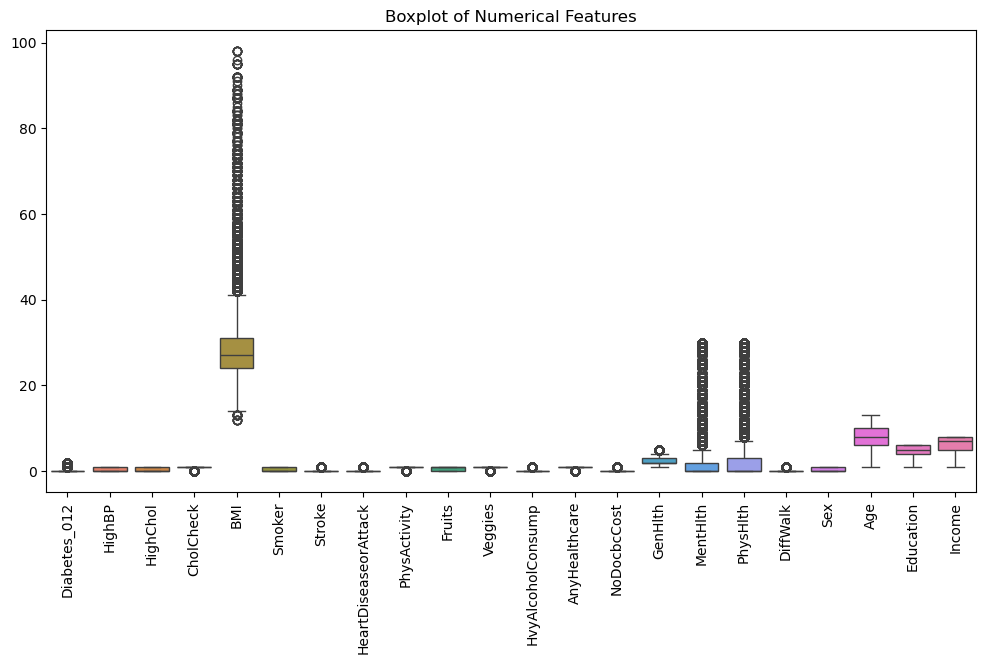

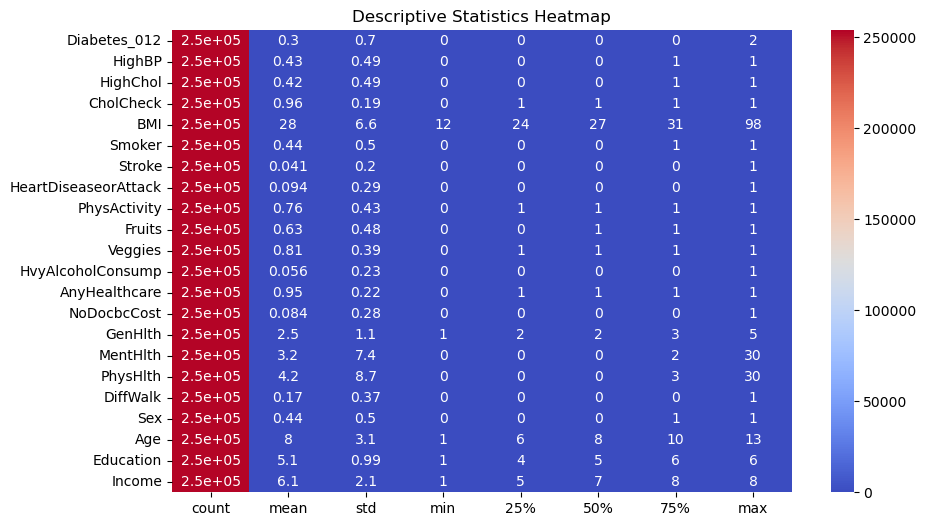

In [79]:
#DATA DESCRIPTION AND PLOTS
data.describe()

plt.figure(figsize=(12,6))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.title("Boxplot of Numerical Features")

plt.figure(figsize=(10,6))
sns.heatmap(data.describe().T, annot=True, cmap="coolwarm")
plt.title("Descriptive Statistics Heatmap")
plt.show()

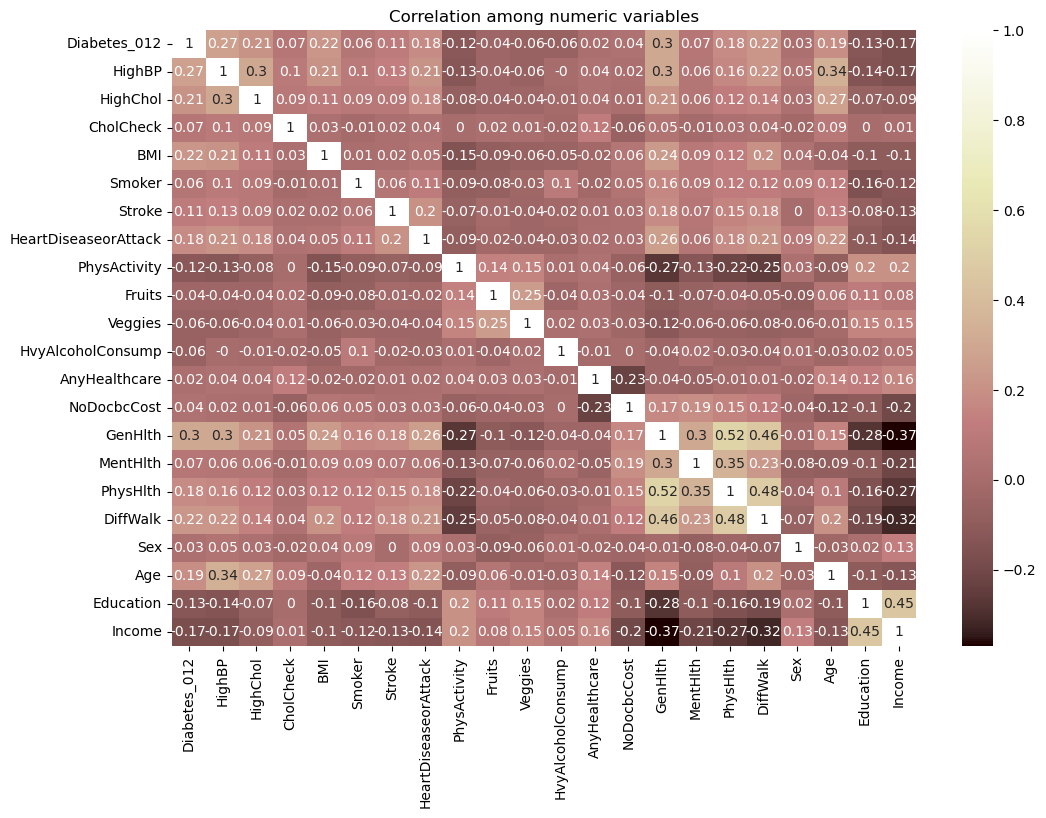

In [80]:
#Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data.corr().round(2), annot=True,cmap="pink")
plt.title("Correlation among numeric variables")
plt.show()

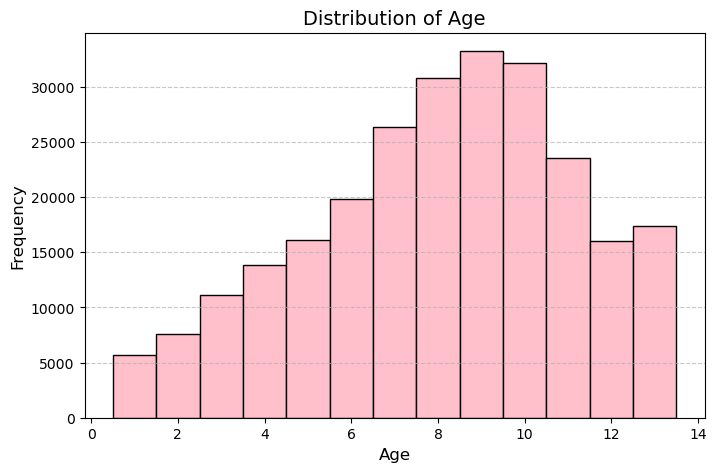

In [81]:
#Distribution of age
bins = np.arange(int(data['Age'].min()), int(data['Age'].max()) + 2)  #was used to connect the disconnted bars
plt.figure(figsize=(8,5))
plt.hist(data['Age'], bins=bins, color='pink', edgecolor='black', align='left')
plt.title("Distribution of Age", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

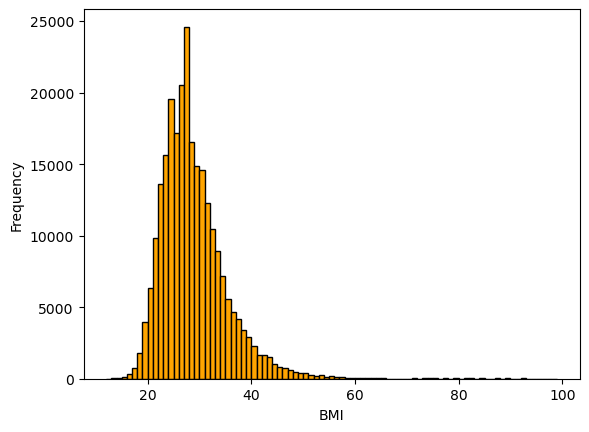

In [82]:
#Distribution of BMI
bins = np.arange(int(data['BMI'].min()), int(data['BMI'].max()) + 2)
plt.hist(data['BMI'],bins=bins,color='orange',edgecolor='black')
plt.title
("Distribution of BMI")
plt.ylabel("Frequency")
plt.xlabel("BMI")
plt.show()

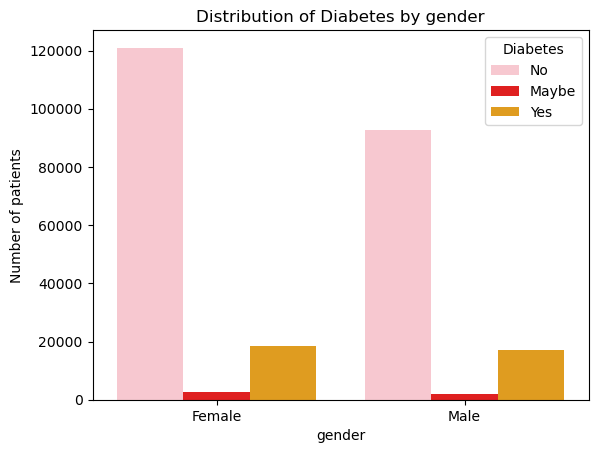

In [83]:
#Distribution of Diabetes by gender
sns.countplot(x='Sex', hue='Diabetes_012',data=data,palette=['pink','red','orange'])
plt.title("Distribution of Diabetes by gender")
plt.ylabel("Number of patients")
plt.xticks([0,1],["Female","Male"])
plt.xlabel("gender")
plt.legend(title="Diabetes",labels=["No","Maybe","Yes"])
plt.show()

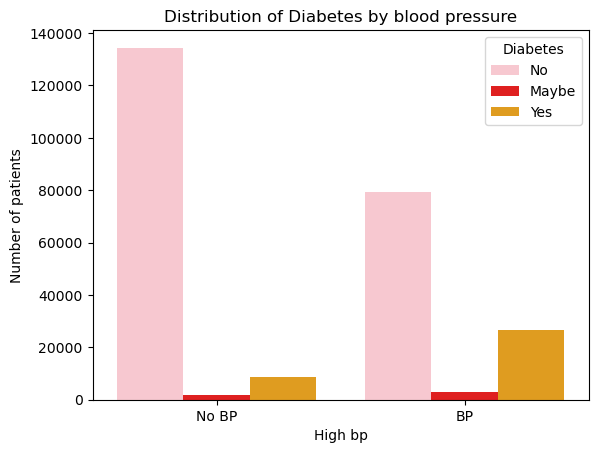

In [84]:
#Distrinution by high bp
sns.countplot(x='HighBP', hue='Diabetes_012',data=data,palette=['pink','red','orange'])
plt.title("Distribution of Diabetes by blood pressure")
plt.ylabel("Number of patients")
plt.xticks([0,1,],["No BP","BP"])
plt.xlabel("High bp")
plt.legend(title="Diabetes",labels=["No","Maybe","Yes"])
plt.show()

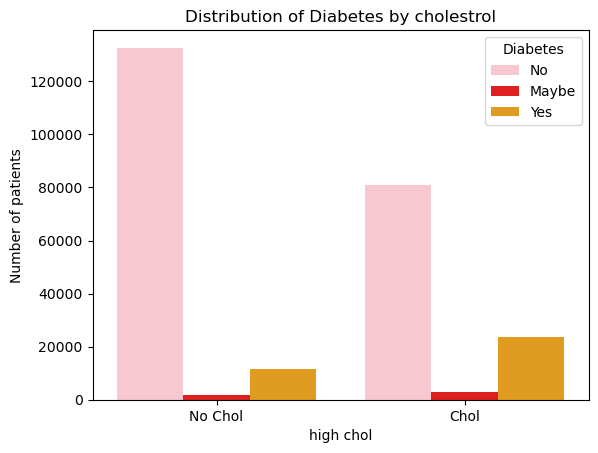

In [85]:
#Distribution by high cholestrol
sns.countplot(x='HighChol', hue='Diabetes_012',data=data,palette=['pink','red','orange'])
plt.title("Distribution of Diabetes by cholestrol")
plt.ylabel("Number of patients")
plt.xticks([0,1],["No Chol","Chol"])
plt.xlabel("high chol")
plt.legend(title="Diabetes",labels=["No","Maybe","Yes"])
plt.show()

In [86]:
X = data.drop(['Diabetes_012', 'Smoker', 'MentHlth', 'PhysHlth', 'Fruits'], axis=1)
Y = data['Diabetes_012']

In [87]:
# Split Train-test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [88]:
model= DecisionTreeClassifier(random_state=42) #class_weighted reduces imbalnces in the dataset and pay attention to small cases
model.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [89]:
Y_pred =model.predict(X_test)

0.7803794807106066
confusion matrix:
[[56257  1132  6791]
 [ 1065    44   316]
 [ 6998   412  3089]]
classification report:
              precision    recall  f1-score   support

         0.0       0.87      0.88      0.88     64180
         1.0       0.03      0.03      0.03      1425
         2.0       0.30      0.29      0.30     10499

    accuracy                           0.78     76104
   macro avg       0.40      0.40      0.40     76104
weighted avg       0.78      0.78      0.78     76104



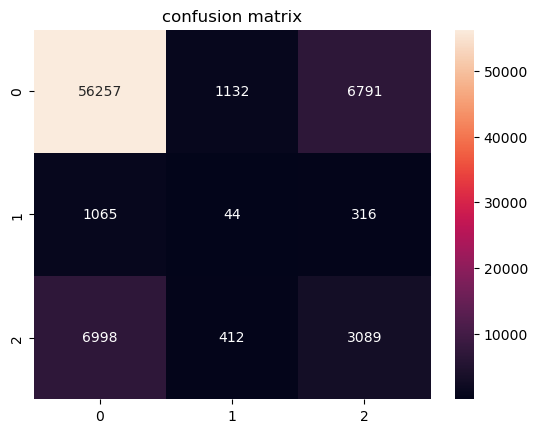

In [90]:
#Evaluations
accuracy = accuracy_score(Y_test,Y_pred)
print(accuracy)
print("confusion matrix:")
print(confusion_matrix(Y_test,Y_pred))
print("classification report:")
print(classification_report(Y_test,Y_pred))

sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True,fmt='d')
plt.title("confusion matrix")
plt.show()

In [91]:

# Training accuracy
train_acc = model.score(X_train, Y_train)

# Cross-validation accuracy
cv_scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='accuracy')
cv_mean = np.mean(cv_scores)

print("Training Accuracy:", train_acc)
print("CV Mean Accuracy:", cv_mean)

Training Accuracy: 0.9743996936522954
CV Mean Accuracy: 0.7808205958637643


In [92]:
#Train a Random Forest
rf = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42) #class_weighted reduces imbalnces in the dataset and pay attention to small cases
rf.fit(X_train, Y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [93]:
Y_pred = rf.predict(X_test)

0.8141096394407653
confusion matrix:
[[59491   807  3882]
 [ 1205    10   210]
 [ 7914   129  2456]]
classification report:
              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90     64180
         1.0       0.01      0.01      0.01      1425
         2.0       0.38      0.23      0.29     10499

    accuracy                           0.81     76104
   macro avg       0.42      0.39      0.40     76104
weighted avg       0.78      0.81      0.80     76104



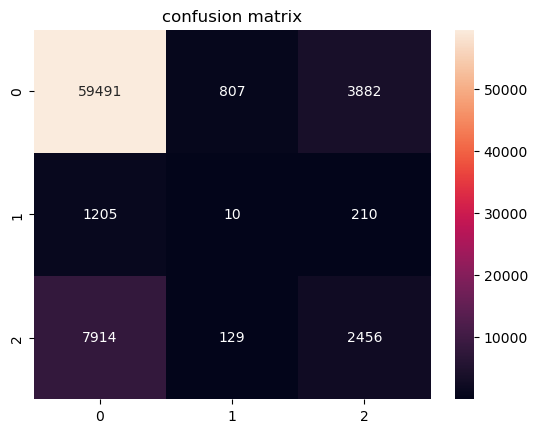

In [94]:
#Evaluations for random forest
accuracy = accuracy_score(Y_test,Y_pred)
print(accuracy)
print("confusion matrix:")
print(confusion_matrix(Y_test,Y_pred))
print("classification report:")
print(classification_report(Y_test,Y_pred))

sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True,fmt='d')
plt.title("confusion matrix")
plt.show()

In [95]:

# Training accuracy
train_acc = model.score(X_train, Y_train)

# Cross-validation accuracy
cv_scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='accuracy')
cv_mean = np.mean(cv_scores)

print("Training Accuracy:", train_acc)
print("CV Mean Accuracy:", cv_mean)

Training Accuracy: 0.9743996936522954
CV Mean Accuracy: 0.7808205958637643
